In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import sys

sys.path.append('..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [5]:
from vantgrd.datasets import read_pima_indians_diabetes, normalize_data
from vantgrd.logistic import LogisticRegressionWithAdadelta, LogisticRegressionWithAdagrad
from vantgrd.fm import FMWithAdagrad, FMWithSGD

In [6]:
X, y = read_pima_indians_diabetes('../data/diabetes/pima-indians-diabetes.data')
X = normalize_data(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# usage with normalized data
# lr = FMWithSGD(eta=0.0005, n_factors=2, epochs=50, rate=1000)
lr = FMWithAdagrad(eta=.01, k0=False, k1=True, regw=.01, regv=.01, n_factors=3, epochs=50, rate=500)
# lr = LogisticRegressionWithAdagrad(eta=0.25, epochs=50, rate=1000)
# lr = LogisticRegressionWithAdadelta(rho=0.8, epochs=50, regw=.001, rate=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

y_test_prob = lr.raw_predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

roc_auc = auc(fpr, tpr)

print("AUC = %f" % roc_auc)
print("Score = {}".format(lr.score(X, y)))

# for i in zip(y_test, y_test_prob):
#     p = 1. if i[1] >= 0.5 else 0.
#     print ','.join([str(x) for x in ['+' if i[0] == p else '-', i[0], p, i[1]]])

Epoch:   0 | Training Samples:       500 | Loss:     1355.75 | LossAdj:  2.71151 | Time taken:    0 seconds
Epoch:   1 | Training Samples:      1000 | Loss:     2600.16 | LossAdj:  2.60016 | Time taken:    0 seconds
Epoch:   2 | Training Samples:      1500 | Loss:     3848.62 | LossAdj:  2.56574 | Time taken:    0 seconds
Epoch:   3 | Training Samples:      2000 | Loss:     5080.42 | LossAdj:  2.54021 | Time taken:    0 seconds
Epoch:   4 | Training Samples:      2500 | Loss:     6138.23 | LossAdj:  2.45529 | Time taken:    0 seconds
Epoch:   5 | Training Samples:      3000 | Loss:     7355.83 | LossAdj:  2.45194 | Time taken:    0 seconds
Epoch:   6 | Training Samples:      3500 | Loss:     8486.60 | LossAdj:  2.42474 | Time taken:    0 seconds
Epoch:   6 | Training Samples:      4000 | Loss:     9666.19 | LossAdj:  2.41655 | Time taken:    0 seconds
Epoch:   7 | Training Samples:      4500 | Loss:    10800.03 | LossAdj:  2.40001 | Time taken:    0 seconds
Epoch:   8 | Training Sample

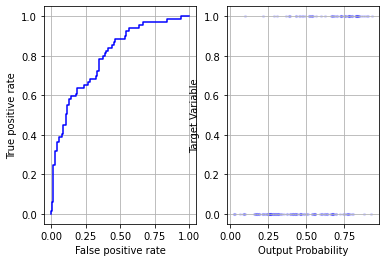

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.plot(fpr, tpr, color='blue', label='ROC area = %0.2f' % roc_auc)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.grid()

bx = fig.add_subplot(1, 2, 2)
bx.scatter(y_test_prob, y_test, s=5, alpha=0.10, color='blue')
bx.set_xlabel("Output Probability")
bx.set_ylabel("Target Variable")
bx.grid()

plt.show()